# Human Activity Recognition

Abstract: Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

# Data Set Information:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years.

Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) 
wearing a smartphone (Samsung Galaxy S II) on the waist. 

Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. 

The experiments have been video-recorded to label the data manually. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in 
fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). 

The sensor acceleration signal, which has gravitational and body motion components, was separated using a 
Butterworth low-pass filter into body acceleration and gravity. 

The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information:

For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

Triaxial Angular velocity from the gyroscope.

A 561-feature vector with time and frequency domain variables.

Its activity label.

An identifier of the subject who carried out the experiment.

In [1]:
import numpy as np                     
import pandas as pd

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.


plt.rcParams["figure.figsize"] = (15, 7)
plt.style.use("ggplot")

<ipython-input-1-a5518d99c858>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


In [2]:
human = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/Human_activity_recognition.csv')
human.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,...,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,-0.941,-0.566,-0.817,0.851,0.674,0.834,-0.987,-1.0,-1.000,-1.000,-0.997,-0.972,-0.983,-0.637,...,-0.736,-1.000,-0.2570,-0.32200,-0.6580,-0.996,-0.995,-0.994,-0.994,-0.997,-0.996,-1.0,-0.994,-0.956,-1.000,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,-0.940,-0.555,-0.816,0.845,0.685,0.838,-0.988,-1.0,-1.000,-1.000,-0.996,-0.980,-0.983,-0.629,...,-0.641,-1.000,-0.0472,0.00787,-0.2840,-0.991,-0.989,-0.991,-0.987,-0.980,-0.991,-1.0,-0.992,-0.923,-1.000,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,-0.943,-0.569,-0.823,0.852,0.693,0.846,-0.997,-1.0,-1.000,-1.000,-0.998,-0.993,-0.990,-0.888,...,-1.000,-0.949,0.3250,-0.75900,-0.9420,-0.999,-0.999,-0.999,-0.999,-0.995,-0.999,-1.0,-0.999,-1.000,-0.968,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,-0.926,-0.448,-0.731,0.849,0.681,0.838,-0.904,-1.0,-0.989,-0.991,-0.989,-0.770,-0.869,-0.163,...,-0.387,-1.000,-0.1730,0.07620,-0.3040,-0.990,-0.989,-0.990,-0.987,-0.999,-0.990,-1.0,-0.992,-0.923,-1.000,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,-0.946,-0.573,-0.827,0.847,0.693,0.848,-0.997,-1.0,-1.000,-1.000,-0.998,-0.990,-0.994,-0.806,...,-0.956,-1.000,-0.0567,0.20700,-0.0231,-1.000,-1.000,-1.000,-1.000,-0.998,-1.000,-1.0,-0.999,-1.000,-0.810,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [3]:
human.shape

(3609, 563)

In [4]:
human.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [5]:
human.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,tBodyAcc.max.Y,tBodyAcc.max.Z,tBodyAcc.min.X,tBodyAcc.min.Y,tBodyAcc.min.Z,tBodyAcc.sma,tBodyAcc.energy.X,tBodyAcc.energy.Y,tBodyAcc.energy.Z,tBodyAcc.iqr.X,tBodyAcc.iqr.Y,tBodyAcc.iqr.Z,tBodyAcc.entropy.X,tBodyAcc.entropy.Y,...,fBodyBodyGyroMag.entropy,fBodyBodyGyroMag.maxInds,fBodyBodyGyroMag.meanFreq,fBodyBodyGyroMag.skewness,fBodyBodyGyroMag.kurtosis,fBodyBodyGyroJerkMag.mean,fBodyBodyGyroJerkMag.std,fBodyBodyGyroJerkMag.mad,fBodyBodyGyroJerkMag.max,fBodyBodyGyroJerkMag.min,fBodyBodyGyroJerkMag.sma,fBodyBodyGyroJerkMag.energy,fBodyBodyGyroJerkMag.iqr,fBodyBodyGyroJerkMag.entropy,fBodyBodyGyroJerkMag.maxInds,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,-0.467034,-0.302020,-0.564031,0.524482,0.388500,0.598995,-0.550917,-0.825680,-0.900953,-0.856139,-0.690362,-0.640241,-0.641478,-0.101894,-0.124818,...,-0.075697,-0.887529,-0.046631,-0.263164,-0.575467,-0.781720,-0.794635,-0.775829,-0.812690,-0.873307,-0.781720,-0.938587,-0.774775,-0.276962,-0.900569,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,0.540188,0.282596,0.280224,0.358055,0.339565,0.290206,0.461532,0.249066,0.131376,0.203520,0.359058,0.368892,0.368321,0.466206,0.433564,...,0.599359,0.160830,0.278786,0.322711,0.319385,0.267605,0.257795,0.278921,0.239738,0.188705,0.267605,0.131507,0.277306,0.622306,0.139138,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,-1.000000,-0.984000,-0.935000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.999000,-1.000000,-1.000000,...,-1.000000,-1.000000,-0.998000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,-0.936000,-0.562000,-0.812000,0.216000,0.112000,0.398000,-0.981000,-1.000000,-1.000000,-0.999000,-0.994000,-0.981000,-0.978000,-0.564000,-0.542000,...,-0.661000,-1.000000,-0.237000,-0.501000,-0.809000,-0.992000,-0.992000,-0.992000,-0.993000,-0.994000,-0.992000,-1.000000,-0.991000,-0.923000,-0.968000,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,-0.877000,-0.456000,-0.718000,0.782000,0.613000,0.771000,-0.860000,-0.997000,-0.991000,-0.981000,-0.956000,-0.866000,-0.843000,-0.066300,-0.097000,...,-0.140000,-0.949000,-0.057100,-0.315000,-0.664000,-0.946000,-0.938000,-0.935000,-0.943000,-0.973000,-0

In [6]:
human.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

### Distribution of Activity

LAYING                681
STANDING              668
SITTING               623
WALKING               603
WALKING_UPSTAIRS      541
WALKING_DOWNSTAIRS    493
Name: activity, dtype: int64


<AxesSubplot:xlabel='activity', ylabel='count'>

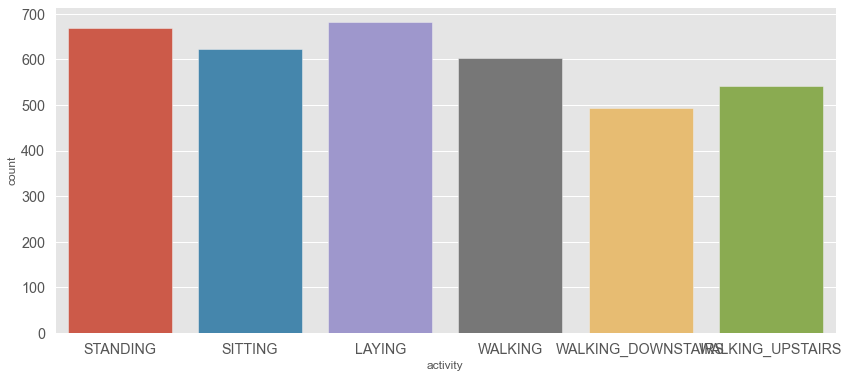

In [7]:
print(human.activity.value_counts())
plt.figure(figsize=(14,6))
sns.countplot(human.activity)

In [8]:
X = human.loc[:,human.columns != 'activity'] 

In [9]:
from sklearn.preprocessing import LabelEncoder

y = human.iloc[:,human.columns == 'activity']
y = pd.DataFrame(LabelEncoder().fit_transform(y))

In [10]:
y.value_counts()

0    681
2    668
1    623
3    603
5    541
4    493
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [13]:
X_sc = scaler.transform(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.95).fit(X_sc)

103 components explain 95% of the variation in data


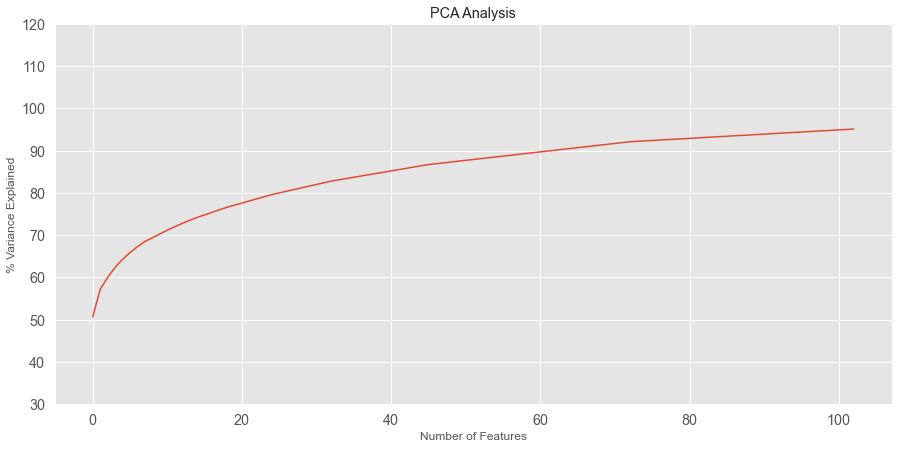

In [15]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,120,5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

print('%d components explain 95%% of the variation in data' % pca.n_components_)

In [16]:
pca = PCA(n_components=103, random_state = 0)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print(X_pca.shape)

(3609, 103)


<AxesSubplot:>

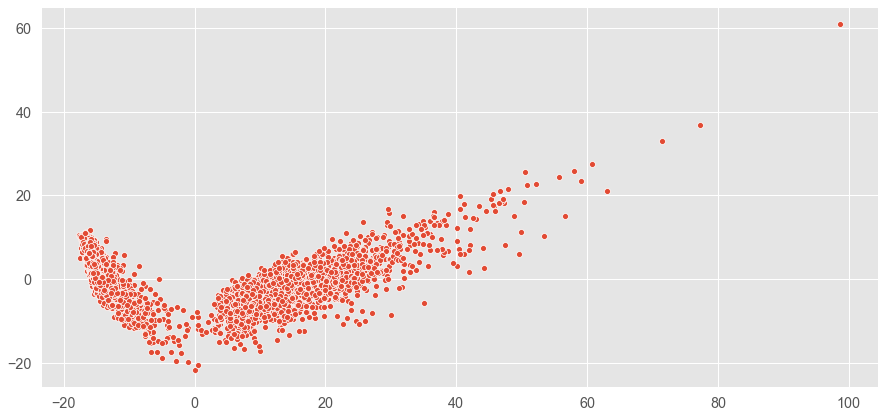

In [17]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])

In [18]:
df = pd.DataFrame(X_pca)

In [19]:
df['activity'] = y

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,activity
0,-15.139129,3.239533,-1.646738,2.837497,3.274434,-0.612869,-0.422494,0.298755,0.055785,-0.931815,-0.083066,-1.272175,-0.421416,-0.550627,0.922332,-1.362695,-0.252358,-0.615790,0.160477,0.177676,-0.857993,-0.716294,0.471225,-0.115363,-0.066279,...,-0.340298,-0.147855,0.456519,-0.309780,0.113105,-0.126969,0.537975,-0.334878,-0.477949,0.542908,0.107380,0.621484,-0.505556,-0.059734,-0.227635,1.463087,-0.046429,0.115081,-0.155915,-0.625223,-0.469397,-0.894132,0.270625,0.017107,2
1,-14.537446,3.296288,-2.674734,3.107395,1.886057,1.235772,-0.440868,-1.020214,1.816712,1.169642,0.440307,-0.327986,-1.420389,-1.516428,1.804757,0.587314,-0.835843,-0.983767,1.777369,0.260378,-0.232804,-0.508071,0.433395,0.517830,0.743161,...,0.395596,0.999060,0.651931,-0.430621,0.006028,0.711082,-0.362983,-0.511117,-1.284438,0.158347,-0.086503,-0.671939,-0.253779,0.279710,0.648032,1.209014,1.500479,-0.596589,-0.321077,0.775814,0.714443,0.065613,-0.299237,0.104783,2
2,-16.220644,8.379663,-3.457924,3.179815,1.255920,-3.061696,-2.389030,1.838184,1.156330,-1.795116,-1.256015,2.001930,0.057871,0.053370,0.806859,0.466020,0.559783,1.671533,1.423082,-0.854301,0.552069,-0.185175,1.789045,-0.528928,0.320129,...,-0.750793,-0.081764,-0.175665,-0.691780,-0.139294,0.692253,-0.355176,0.342095,1.238166,-0.001975,0.154056,1.096919,0.825105,0.411440,-0.435047,0.425946,0.082992,0.502824,-0.981620,-0.654078,0.333764,-0.532415,0.176447,-0.158734,2
3,-12.583396,-6.355005,3.483158,1.764695,6.359251,2.162070,-2.188613,3.139262,-1.821800,-0.547807,3.724401,2.248700,2.482181,-1.896383,0.014822,1.543323,-0.481291,-0.817224,1.755083,2.606612,0.755720,-2.764713,-1.185321,0.920361,0.804511,...,-0.747712,0.326626,-0.383343,1.013244,-0.032932,0.921546,-0.273894,0.943856,-0.695535,-0.194960,-0.459966,-1.006399,-0.608765,-0.171739,-0.364757,0.301791,0.331355,-0.493427,-1.265220,-1.123692,-0.844182,0.069572,0.264390,0.879932,2
4,-16.202756,6.321675,-1.244568,2.176206,2.343775,-4.418212,-0.570859,0.640881,-0.405535,-1.712073,-0.415000,1.040352,-0.626711,-0.641065,-0.734044,-3.280403,-0.920603,0.000816,-0.497821,-2.469727,-0.517642,0.576897,2.668531,1.608245,-0.575292,...,-0.696096,-0.810799,-0.257049,0.494510,-0.221468,0.547022,-0.035698,-0.249865,0.579866,-0.281058,0.100867,0.270235,1.771634,-1.018647,0.097881,-0.424421,1.264518,2.077950,-0.324678,-0.826692,0.196769,-0.045027,-1.018842,0.056133,2


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=0) 

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2706, 103)
(2706, 1)
(903, 103)
(903, 1)


## Modelling

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Support Vector Machines

In [24]:
svc1 = SVC(random_state = 0) 
svc1.fit(X_train,y_train)
y_pred_svc = svc1.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_svc))

Accuracy Score:
0.9534883720930233


- Default Linear kernel

In [26]:
svc2=SVC(kernel='linear')
svc2.fit(X_train,y_train)
y_pred=svc2.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9534883720930233


- Default RBF kernel

In [27]:
svc3=SVC(kernel='rbf')
svc3.fit(X_train,y_train)
y_pred=svc3.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9534883720930233


- Default Polynomial kernel

In [28]:
svc4=SVC(kernel='poly')
svc4.fit(X_train,y_train)
y_pred=svc4.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9368770764119602


- K-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
def generate():
    svc = SVC(kernel='rbf',random_state = 0)
    scores = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy') 
    return scores.mean()
generate()

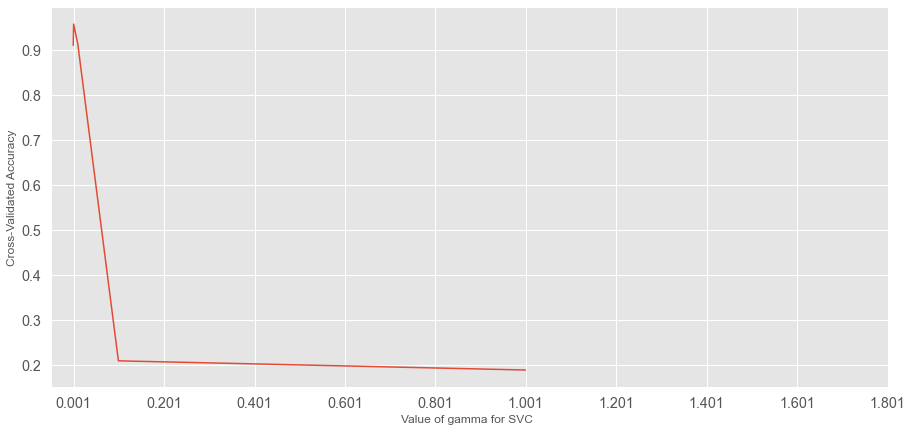

In [29]:
gamma_range=[0.0001,0.001,0.01,0.1,1]
acc_score=[]

def generate():
    for g in gamma_range:
        svc = SVC(kernel='rbf', gamma=g)
        scores = cross_val_score(svc,X_train,y_train, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(gamma_range,acc_score)
    
    plt.xlabel('Value of gamma for SVC ')
    
    plt.xticks(np.arange(0.001,2,0.2))
    
    plt.ylabel('Cross-Validated Accuracy')
    
    return
    
generate()

- We can see there is constant decrease in the accuracy score as gamma value increase.
- Thus gamma = 0.01 is the best parameter.

In [32]:
def generate():
    svc = SVC(kernel = 'rbf',gamma = 0.001, random_state = 0) 
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    print('Accuracy Score:')
    print(metrics.accuracy_score(y_test,y_pred))
    return svc
generate()

Accuracy Score:
0.946843853820598


SVC(gamma=0.001, random_state=0)

- K-fold cross validation

In [33]:
def generate():
    svc = SVC(kernel='rbf',gamma = 0.001, random_state = 0)
    scores = cross_val_score(svc, X_pca, y, cv=10, scoring='accuracy') 
    return scores.mean()
generate()

0.9304578331794398

Taking polynomial kernel with different degree

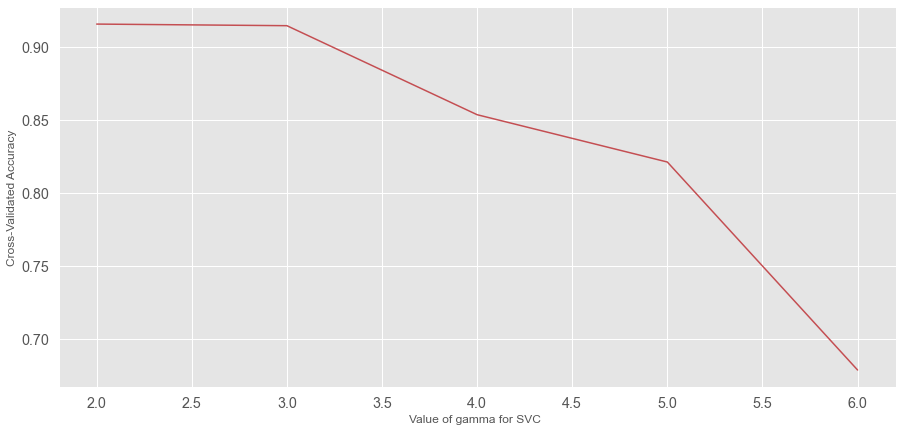

In [34]:
degree_range = [2,3,4,5,6]
acc_score=[]

def generate():
    for d in degree_range:
        svc = SVC(kernel='poly', degree=d)
        scores = cross_val_score(svc, X_pca, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(degree_range,acc_score,color='r')
    
    plt.xlabel('Value of gamma for SVC ')
    
    #plt.xticks(np.arange(0.001,100,5))
    
    plt.ylabel('Cross-Validated Accuracy')
    return
generate()

In [35]:
def generate():
    svc = SVC(kernel = 'poly',degree = 3, random_state = 0) 
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print('Accuracy Score:')
    print(metrics.accuracy_score(y_test,y_pred))
    return
generate()

Accuracy Score:
0.9368770764119602


- K-fold cross validation

In [36]:
def generate():
    svc = SVC(kernel='poly',degree = 3, random_state = 0)
    scores = cross_val_score(svc, X_pca, y, cv=10, scoring='accuracy') 
    return scores.mean()
generate()

0.9149299784549092

SVC Model Using Linear kernel

In [ ]:
C_range=list(range(1,15))
acc_score=[]

def generate():
    for c in C_range:
        svc = SVC(kernel = 'linear', C = c)
        scores = cross_val_score(svc, X_pca, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(C_range,acc_score)
    
    plt.xlabel('Value of C for SVC ')
    
    plt.xticks(np.arange(0,16,1))
    
    plt.ylabel('Cross-Validated Accuracy')
    return
generate()

In [ ]:
C_range = list(np.arange(0.1,6,0.1))
acc_score=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for c in C_range:
        svc = SVC(kernel = 'linear', C = c)
        scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(C_range,acc_score)
    
    plt.xlabel('Value of C for SVC ')
    
    plt.xticks(np.arange(0,6,0.3))
    
    plt.ylabel('Cross-Validated Accuracy')
    return
generate()

In [ ]:
C_range=list(np.arange(0.1,0.5,0.1))
acc_score=[]

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def generate():
    for c in C_range:
        svc = SVC(kernel = 'linear', C = c)
        scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
        acc_score.append(scores.mean())
    
    plt.plot(C_range,acc_score)
    
    plt.xlabel('Value of C for SVC ')
    
    plt.xticks(np.arange(0.0,0.5,0.1))
    
    plt.ylabel('Cross-Validated Accuracy')
    return
generate()

SVM by taking hyperparameter C=0.1

In [ ]:
def generate():
    svc = SVC(kernel = 'linear',C= 0.1, random_state = 0) 
    svc.fit(X_train,y_train)
    y_pred=svc.predict(X_test)
    print('Accuracy Score:')
    print(metrics.accuracy_score(y_test,y_pred))
    return
generate()

- K-fold cross validation

In [ ]:
def generate():
    svc = SVC(kernel='linear',C = 0.1, random_state = 0)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
    return scores.mean()
generate()

- GridSearchCV for hyperparameter tuning of your SVM classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

from sklearn.svm import SVC
svm_model = SVC()

def generate():
    param_dist = [
                     {'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear']},
                     {'C': (np.arange(0.1,1.1,0.1)) , 'gamma': ['auto','auto_deprecated','scale'], 'kernel': ['rbf']},
                     {'degree' : [2,3,4] ,'gamma' :[0.01,0.02,0.03,0.04,0.05], 'C' :(np.arange(0.1,1,0.1)) , 'kernel':['poly']}
                 ]

    
    model_svm = GridSearchCV( svm_model,
                                    param_grid = param_dist,     
                                    n_jobs = -1,
                                    cv = 10,
                                    scoring = 'accuracy')
    model_svm.fit(X_train, y_train)
    print('Mean cross-validated score of the best_estimator is: {}'.format(model_svm.best_score_))
    y_pred= model_svm.predict(X_test)
    print('Accuracy_score is : {} '.format(metrics.accuracy_score(y_pred,y_test)))
    return model_svm
model_svm = generate()
print('Parameter setting that gave the best results:\n ',model_svm.best_params_)

Conclusion

We have seen how by finely tuning C and gamma values for differnt kernel choices we can obtain maximum accuracy for our SVM model.

###  K Nearest Neibour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

In [ ]:
# Fitting the model
knn.fit(data_train, label_train)

In [ ]:
# Predicting the Test set results
y_preds = knn.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import numpy as np

def generate():
    param_dist = {"n_neighbors": range(1,30),                             #  specify parameters and distributions to sample from
                  "algorithm" : ["auto", "ball_tree"],
                  "leaf_size" :  2 ** np.arange(10),
                  "metric" : ["euclidean","manhattan","minkowski","chebyshev"]
                 }
    

    n_iter_search = 25
    knn_model = KNeighborsClassifier()
    
    return RandomizedSearchCV(knn_model,random_state = 0, param_distributions = param_dist,     
                                    n_iter = n_iter_search,
                                    n_jobs = -1)
knn_model2 = generate()
knn_model2.fit(X_train,y_train)                                         # fitting the model

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_list = []
def generate():
    for i in range(1,30):
        knn_model_ = KNeighborsClassifier(n_neighbors = i)
        knn_model_.fit(X_train, y_train)
        pred_i = knn_model_.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, pred_i))
    
    print("Maximum accuracy and the corresponding value of k is",
          max([(v,i+1) for i,v in enumerate(accuracy_list)]),'respectively.')

generate()

#### Plot Accuracy of model at various k values and find the best value of k.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def generate():
    plt.figure(figsize=(15,6))
    plt.plot(range(1,30),accuracy_list,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
    plt.xlabel('K')
    plt.ylabel('Accuracy of model')
    plt.show()
generate()
import matplotlib.pyplot as plt

#### Evaluate all the models using accuracy score and print them out.

In [ ]:
from sklearn.metrics import accuracy_score
def generate():
    print('\n\n Accuracy score for test data for knn_model1 is :',accuracy_score(y_test, predictions_knn_model1))
    print('\n\n Accuracy score for test data for knn_model2 is :',accuracy_score(y_test, predictions_knn_model2))
    print('\n\n Accuracy score for test data for knn_model3 is :',accuracy_score(y_test, predictions_knn_model3))
    print('\n\n Accuracy score for test data for logreg model is :',accuracy_score(y_test, predictions_logreg))
    return 
generate()

### CART, Random Forest & Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

In [ ]:
logis.fit(data_train, label_train)

In [ ]:
y_pred = logis.predict(data_test)

In [ ]:
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(label_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

In [ ]:
lr = LogisticRegression()
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')
rf = RandomForestClassifier(n_estimators = 10)

lr = lr.fit(x_train, y_train)

rf = rf.fit(x_train, y_train)

lr_l2 = lr_l2.fit(x_train, y_train)

In [ ]:
y_predict = list()
y_proba = list()

labels = ['lr', 'lr_l2', 'rf']
models = [lr, lr_l2, rf]

for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))
    #.max(axis = 1) for a 1 dimensional dataframe

y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

y_predict.head()

## Model Evaluation

In [ ]:
metrics = list()
confusion_m = dict()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    
    accuracy = accuracy_score(y_val, y_predict[lab])
    
    confusion_m[lab] = confusion_matrix(y_val, y_predict[lab])
    
    metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
metrics= pd.concat(metrics, axis =1)

In [ ]:
print(confusion_matrix(Y_test_label,Y_pred_label))
print("\n")
print(classification_report(Y_test_label,Y_pred_label))

print("Training set score for SVM: %f" % final_model.score(X_train_scaled , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , Y_test ))

svm_model.score

#### Evaluate all the models using confusion matrix and print them out.

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_knn_model1 = pd.DataFrame()
matrix_knn_model2 = pd.DataFrame()
matrix_knn_model3 = pd.DataFrame()
matrix_logreg = pd.DataFrame()
def generate():
    matrix_knn_model1 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model1))
    matrix_knn_model1.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model1.columns = ['Predicted Not Diabetes','Predicted Diabetes']
    print('\n\n confusion matrix for knn_model1 is\n\n',matrix_knn_model1)
    
    matrix_knn_model2 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model2))
    matrix_knn_model2.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model2.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
    print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model2)
    
     
    matrix_knn_model3 = pd.DataFrame(confusion_matrix(y_test, predictions_knn_model3))
    matrix_knn_model3.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_knn_model3.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
    print('\n\n confusion matrix for knn_model2 is\n\n',matrix_knn_model3)
    
    matrix_logreg = pd.DataFrame(confusion_matrix(y_test, predictions_logreg))
    matrix_logreg.index = ['Actual Not Diabetes','Actual Diabetes']
    matrix_logreg.columns = ['Predicted Not Diabetes','Predicted Diabetes'] 
    print('\n\n confusion matrix for logreg is\n\n',matrix_logreg)
    
    return 
generate()

####  Evaluate all the models using classification matrix and print them out

In [ ]:
from sklearn.metrics import classification_report
def generate():
    print('\n\n classification report for knn_model1:\n\n',classification_report(y_test, predictions_knn_model1))
    print('\n\n classification report for knn_model2:\n\n',classification_report(y_test, predictions_knn_model2))
    print('\n\n classification report for knn_model3:\n\n',classification_report(y_test, predictions_knn_model3))
    print('\n\n classification report for logreg:\n\n',classification_report(y_test, predictions_logreg))
    return
generate()

### Model Comparison

In [ ]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'kNN'],
        'Accuracy_score' : [logit_accuracy, knn_accuracy]
    })
models.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
list_accuracy = [test_accuracy_LR,test_accuracy_DTC,test_accuracy_RFC,test_accuracy_SVC]
list_model = ['LR','DTC','RFC','SVC']
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
sns.barplot(x=list_model, y=list_accuracy, ax=ax,palette ='Dark2')
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.show()

Conclusion:

knn_model3 i.e the model with k = 5 comes out to be the best model among the three models used.